In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [22]:
start = '2022-04-01'
end = '2022-04-08'

In [23]:
request = requests.get(url)

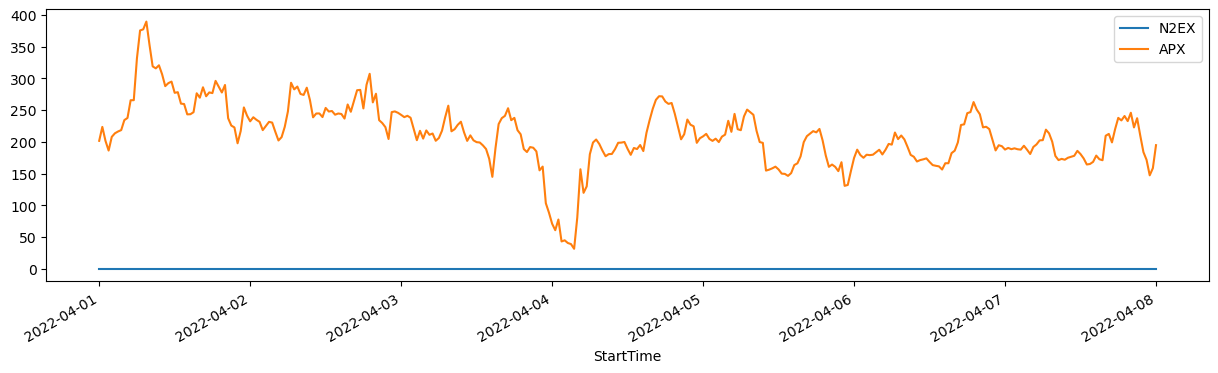

In [99]:
pd.Series([1,1,2], index=['a','b','c']).drop_duplicates(index='a')


a    1
c    2
dtype: int64

In [103]:
from io import StringIO

start = '2022-04-01'
end  = '2022-05-01'

url = (
    'https://data.elexon.co.uk/bmrs/api/v1/balancing/pricing/'
    'market-index?from={}T00%3A00Z&to={}'
    'T00%3A00Z&dataProviders=N2EX&dataProviders=APX&format=csv'
)


def dt(dt):
    return pd.Timestamp(dt)



df = build_day_ahead_prices(start, end)


2022-05-01 00:00:00+00:00
0 days 00:00:00
2022-04-01 2022-04-08
7 days 00:00:00
2022-04-08 2022-04-15
14 days 00:00:00
2022-04-15 2022-04-22
21 days 00:00:00
2022-04-22 2022-04-29
28 days 00:00:00
2022-04-29 2022-05-01


In [123]:
all_dates = list(map(pd.Timestamp, pd.date_range(start, end, freq='30min', tz='utc')[:-1]))

pd.Index(all_dates).difference(df.index)

DatetimeIndex(['2022-04-30 17:30:00+00:00'], dtype='datetime64[ns, UTC]', freq=None)

In [124]:
print(pd.Index(all_dates)[0])
print(df.index[0])
print(pd.Index(all_dates)[0] == df.index[0])

2022-04-01 00:00:00+00:00
2022-04-01 00:00:00+00:00
True


In [102]:
df.loc['2022-04-15 00:00:00+00:00']

StartTime
2022-04-15 00:00:00+00:00    140.74
2022-04-15 00:00:00+00:00    140.74
dtype: float64

In [95]:
pd.Series(df.index).value_counts()

StartTime
2022-04-01 00:00:00+00:00    1
2022-04-20 14:30:00+00:00    1
2022-04-20 18:30:00+00:00    1
2022-04-20 18:00:00+00:00    1
2022-04-20 17:30:00+00:00    1
                            ..
2022-04-10 18:00:00+00:00    1
2022-04-10 17:30:00+00:00    1
2022-04-10 17:00:00+00:00    1
2022-04-10 16:30:00+00:00    1
2022-04-30 23:30:00+00:00    1
Name: count, Length: 1385, dtype: int64

In [59]:
df.groupby(df.index)['Volume'].sum()

StartTime
2022-04-08 00:00:00+00:00    766.55
2022-04-08 00:30:00+00:00    805.30
2022-04-08 01:00:00+00:00    796.60
2022-04-08 01:30:00+00:00    837.10
2022-04-08 02:00:00+00:00    753.95
                              ...  
2022-04-29 22:00:00+00:00    588.20
2022-04-29 22:30:00+00:00    346.25
2022-04-29 23:00:00+00:00    227.65
2022-04-29 23:30:00+00:00    365.60
2022-04-30 00:00:00+00:00    612.10
Name: Volume, Length: 1057, dtype: float64

In [68]:
clean = (
    (a := df.loc[df.DataProvider == "APXMIDP"])['Price'].mul(
        a.Volume.div(
            t := df.groupby(df.index)['Volume'].sum()
        )) + 
    (n := df.loc[df.DataProvider == "N2EXMIDP"])['Price'].mul(
        n.Volume.div(t)
    )
)

In [72]:
clean.rename('day_ahead_price').to_frame()

,day_ahead_price
StartTime,
2022-04-08 00:00:00+00:00,194.74
2022-04-08 00:30:00+00:00,208.77
2022-04-08 01:00:00+00:00,198.25
2022-04-08 01:30:00+00:00,194.20
2022-04-08 02:00:00+00:00,190.06
...,...
2022-04-29 22:00:00+00:00,170.50
2022-04-29 22:30:00+00:00,101.14
2022-04-29 23:00:00+00:00,101.30


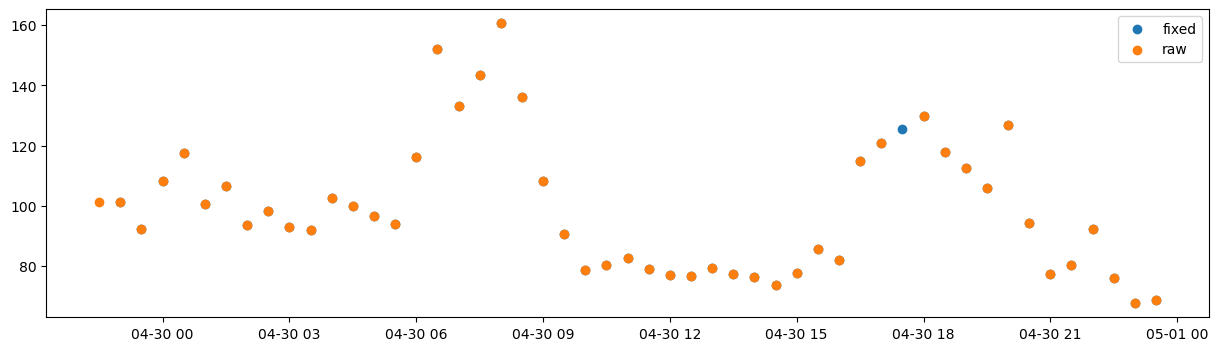

In [134]:
fig, ax =  plt.subplots(1, 1, figsize=(15, 4))

# df.plot.scatter(ax=ax, label='clean')
d = df.reindex(all_dates).interpolate()
ax.scatter(d.index[-50:], d.values[-50:], label='fixed')
ax.scatter(df.index[-50:], df.values[-50:], label='raw')

ax.legend()
plt.show()

In [46]:
from io import StringIO


start = '2022-04-01'
end = '2022-04-05'
url = (
    'https://data.elexon.co.uk/bmrs/api/v1/balancing/pricing/'
    f'market-index?from={start}T00%3A00Z&to={end}'
    'T00%3A00Z&dataProviders=N2EX&dataProviders=APX&format=csv'
)
print(url)

response = requests.get(url)
data = StringIO(response.text)
df = pd.read_csv(data, index_col=0, parse_dates=True)

'https://data.elexon.co.uk/bmrs/api/v1/balancing/pricing/market-index?from=2022-10-12T00%3A00Z&to=2022-10-19T00%3A00Z&dataProviders=N2EX&dataProviders=APX&format=csv'


https://data.elexon.co.uk/bmrs/api/v1/balancing/pricing/market-index?from=2022-04-01T00%3A00Z&to=2022-04-05T00%3A00Z&dataProviders=N2EX&dataProviders=APX&format=csv


'https://data.elexon.co.uk/bmrs/api/v1/balancing/pricing/market-index?from=2022-10-12T00%3A00Z&to=2022-10-19T00%3A00Z&dataProviders=N2EX&dataProviders=APX&format=csv'

In [48]:
df.sort_index()

,DataProvider,SettlementDate,SettlementPeriod,Price,Volume
StartTime,,,,,
2022-04-01 00:00:00+00:00,N2EXMIDP,2022-04-01,3,0.00,0.00
2022-04-01 00:00:00+00:00,APXMIDP,2022-04-01,3,201.57,757.15
2022-04-01 00:30:00+00:00,APXMIDP,2022-04-01,4,223.50,935.80
2022-04-01 00:30:00+00:00,N2EXMIDP,2022-04-01,4,0.00,0.00
2022-04-01 01:00:00+00:00,APXMIDP,2022-04-01,5,201.54,897.50
...,...,...,...,...,...
2022-04-04 23:00:00+00:00,APXMIDP,2022-04-05,1,198.42,663.70
2022-04-04 23:30:00+00:00,N2EXMIDP,2022-04-05,2,0.00,0.00
2022-04-04 23:30:00+00:00,APXMIDP,2022-04-05,2,205.67,696.05
